In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
cnn = tf.keras.models.Sequential()


In [9]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25))


In [15]:
cnn.add(tf.keras.layers.Flatten())


In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))


In [17]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 4453s 2s/step - loss: 1.3775 - accuracy: 0.5928 - val_loss: 0.5548 - val_accuracy: 0.8302
Epoch 2/10
2197/2197 [==============================] - 51638s 24s/step - loss: 0.4427 - accuracy: 0.8602 - val_loss: 0.3097 - val_accuracy: 0.9014
Epoch 3/10
2197/2197 [==============================] - 3770s 2s/step - loss: 0.2656 - accuracy: 0.9138 - val_loss: 0.2085 - val_accuracy: 0.9313
Epoch 4/10
2197/2197 [==============================] - 22034s 10s/step - loss: 0.1811 - accuracy: 0.9407 - val_loss: 0.1783 - val_accuracy: 0.9429
Epoch 5/10
2197/2197 [==============================] - 40729s 19s/step - loss: 0.1401 - accuracy: 0.9537 - val_loss: 0.2203 - val_accuracy: 0.9282
Epoch 6/10
2197/2197 [==============================] - 27446s 12s/step - loss: 0.1063 - accuracy: 0.9657 - val_loss: 0.1903 - val_accuracy: 0.9438
Epoch 7/10
2197/2197 [==============================] - 17546s 8s/step - loss: 0.0899 - accuracy: 0.9700 - val_loss:

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 1164s 530ms/step - loss: 0.0198 - accuracy: 0.9934
Training accuracy: 0.9934419393539429


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 426s 774ms/step - loss: 0.1192 - accuracy: 0.9674
Validation accuracy: 0.9674482345581055


In [24]:
cnn.save('trained_plant_disease_model.keras')

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [29]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
cm = confusion_matrix(Y_true,predicted_categories)

17572/17572 [==============================] - 1060s 60ms/step


In [31]:
class_name = validation_set.class_names
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.96       504
                                 Apple___Black_rot       0.98      0.95      0.96       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.97      0.96      0.96       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.97      0.

In [32]:

#Validation set Accuracy
test_loss, test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

17572/17572 [==============================] - 576s 33ms/step - loss: 0.1192 - accuracy: 0.9674
Test accuracy: 0.9674482345581055


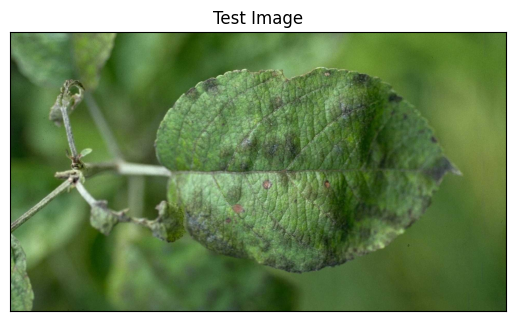

In [46]:
#Test Image Visualization
import cv2
image_path = "paat.jpg"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [47]:
import numpy as np
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 43ms/step


In [48]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

25


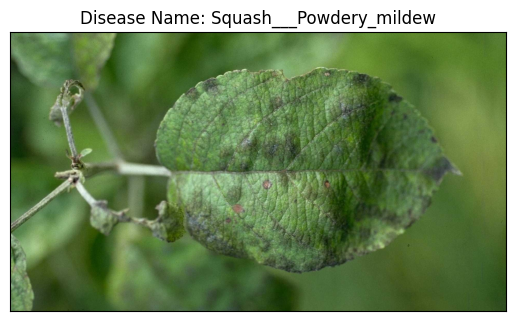

In [49]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()